In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from tqdm import tqdm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from scipy.ndimage.filters import gaussian_filter
tqdm.pandas()
import cmocean
import matplotlib as mpl

C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\tqdm\std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

In [3]:
PATH_RAW = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'
PATH_64x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_rejigged_fulltile/'
PATH_32x17 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile_64pxwindow/'
PATH_32x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile/'

In [4]:
no_files = len(os.listdir(PATH_32x17+'DataCubes'))
no_files

163

In [5]:
df = pd.DataFrame(columns = ['H_32x17','ColumnDensity'])
for i in tqdm(range(no_files)):
    cube_32x17 = pickle.load(open(f'{PATH_32x17}/DataCubes/{os.listdir(PATH_32x17+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['ColumnDensity'] = cube_32x17[0].flatten()
    temp_df['H_32x17'] = np.pad(cube_32x17[1],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)
df

100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [05:18<00:00,  1.95s/it]


,H_32x17,ColumnDensity
49153,0.973718,35.510368
49154,0.972911,36.127888
49155,0.972078,36.408245
49156,0.971187,36.114960
49157,0.970141,35.590656
...,...,...
2027325,0.998691,17.573132
2027326,0.998882,17.809624
2027327,0.999087,17.961401
2027328,0.999333,18.161451


100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [05:42<00:00,  2.10s/it]


OSError: [Errno 22] Invalid argument: 'D:\\Workshop\\PhD\\Papers\\HiGal paper\\Images/ColDensDependency.png'

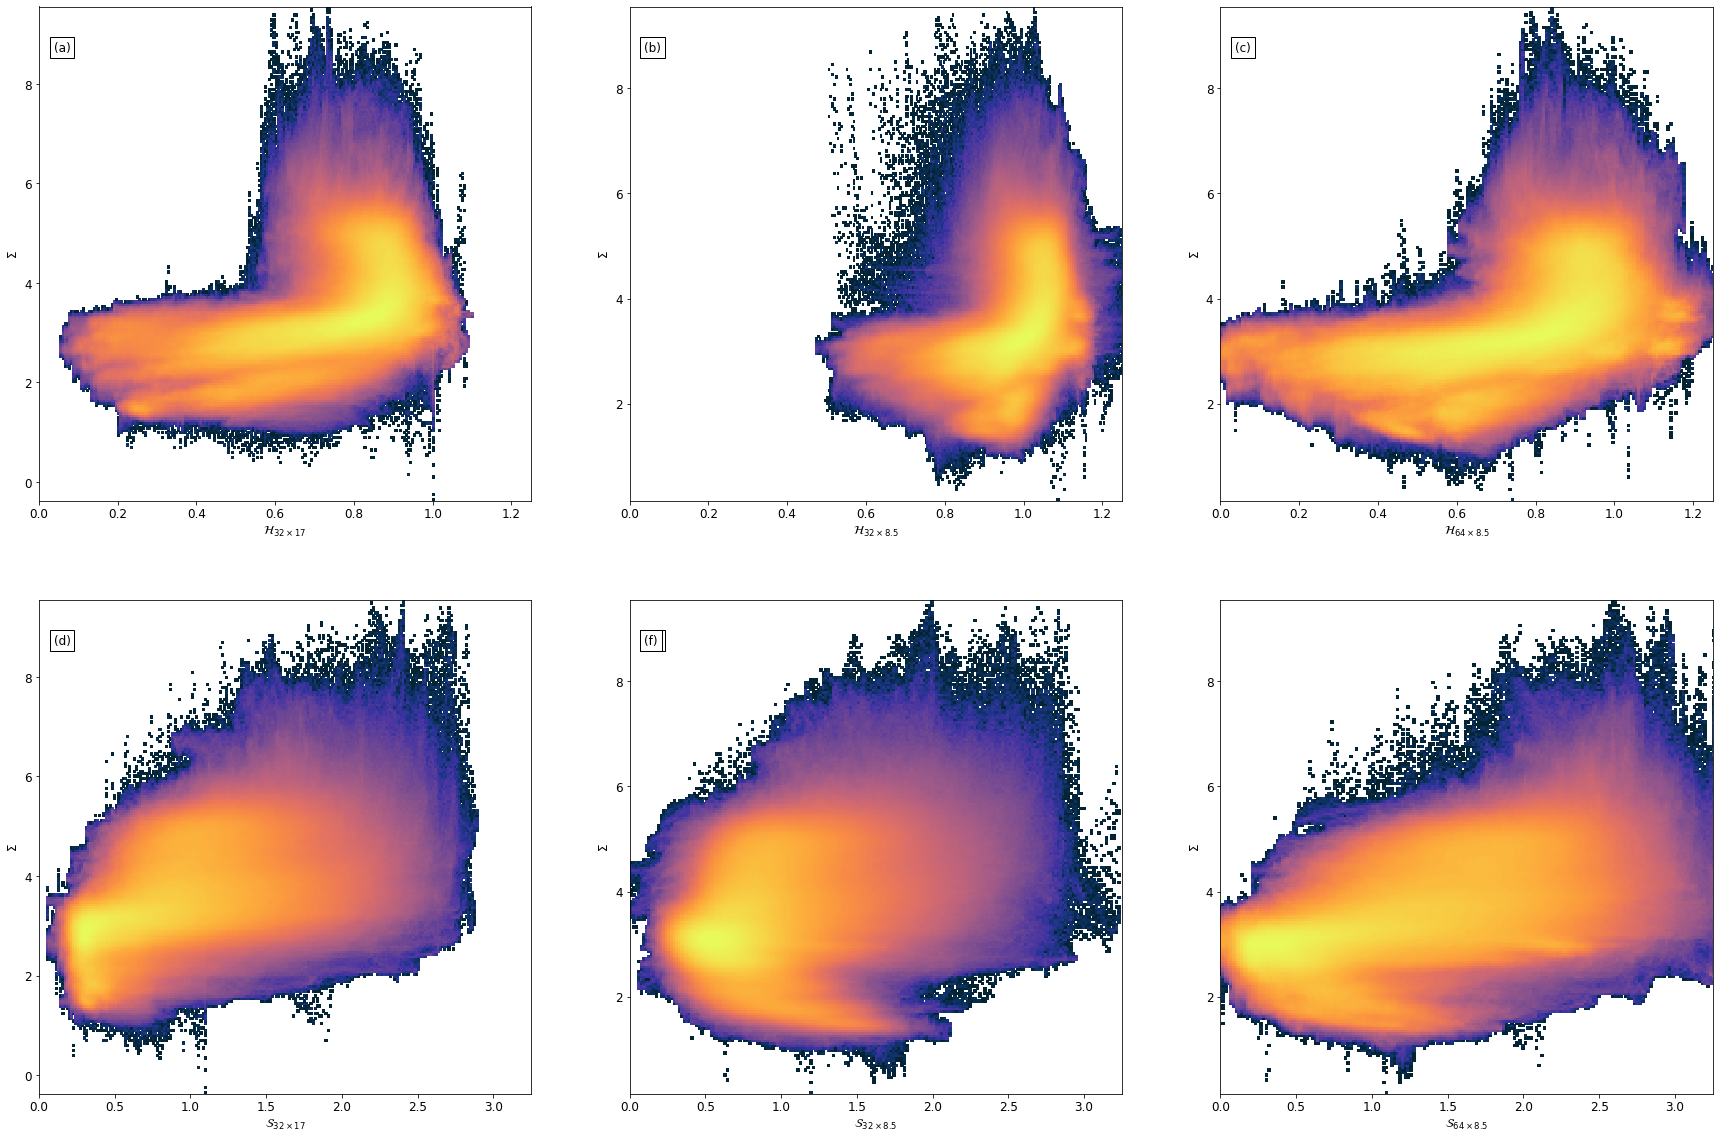

In [6]:
plt.rcParams.update({'font.size': 12})
f,ax = plt.subplots(2,3, figsize=(30,20))

# H

ax[0,0].hist2d(df['H_32x17'],np.log(df['ColumnDensity']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,0].set_xlabel(r'$\mathcal{H}_{32\times 17}$')
ax[0,0].set_ylabel(r'$\Sigma$')
ax[0,0].text(0.03, 0.91, '(a)', transform=ax[0,0].transAxes,bbox = dict(facecolor='white'))
ax[0,0].set_xlim([0,1.25])

df = pd.DataFrame(columns = ['H_32x85','ColumnDensity'])
for i in tqdm(range(no_files)):
    cube_32x85 = pickle.load(open(f'{PATH_32x85}/DataCubes/{os.listdir(PATH_32x85+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['ColumnDensity'] = cube_32x85[0].flatten()
    temp_df['H_32x85'] = np.pad(cube_32x85[1],((15,16),(15,16)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[0,1].hist2d(df['H_32x85'],np.log(df['ColumnDensity']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,1].set_xlabel(r'$\mathcal{H}_{32\times 8.5}$')
ax[0,1].set_ylabel(r'$\Sigma$')
ax[0,1].text(0.03, 0.91, '(b)', transform=ax[0,1].transAxes,bbox = dict(facecolor='white'))
ax[0,1].set_xlim([0,1.25])

df = pd.DataFrame(columns = ['H_64x85','ColumnDensity'])
for i in tqdm(range(no_files)):
    cube_64x85 = pickle.load(open(f'{PATH_64x85}/DataCubes/{os.listdir(PATH_64x85+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['ColumnDensity'] = cube_64x85[0].flatten()
    temp_df['H_64x85'] = np.pad(cube_64x85[1],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[0,2].hist2d(df['H_64x85'],np.log(df['ColumnDensity']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,2].set_xlabel(r'$\mathcal{H}_{64\times 8.5}$')
ax[0,2].set_ylabel(r'$\Sigma$')
ax[0,2].text(0.03, 0.91, '(c)', transform=ax[0,2].transAxes,bbox = dict(facecolor='white'))
ax[0,2].set_xlim([0,1.25])

# S

df = pd.DataFrame(columns = ['S_32x17','ColumnDensity'])
for i in tqdm(range(no_files)):
    cube_32x17 = pickle.load(open(f'{PATH_32x17}/DataCubes/{os.listdir(PATH_32x17+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['ColumnDensity'] = cube_32x17[0].flatten()
    temp_df['S_32x17'] = np.pad(cube_32x17[2],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[1,0].hist2d(df['S_32x17'],np.log(df['ColumnDensity']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,0].set_xlabel(r'$\mathcal{S}_{32\times 17}$')
ax[1,0].set_ylabel(r'$\Sigma$')
ax[1,0].text(0.03, 0.91, '(d)', transform=ax[1,0].transAxes,bbox = dict(facecolor='white'))
ax[1,0].set_xlim([0,3.25])

df = pd.DataFrame(columns = ['S_32x85','ColumnDensity'])
for i in tqdm(range(no_files)):
    cube_32x85 = pickle.load(open(f'{PATH_32x85}/DataCubes/{os.listdir(PATH_32x85+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['ColumnDensity'] = cube_32x85[0].flatten()
    temp_df['S_32x85'] = np.pad(cube_32x85[2],((15,16),(15,16)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[1,1].hist2d(df['S_32x85'],np.log(df['ColumnDensity']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,1].set_xlabel(r'$\mathcal{S}_{32\times 8.5}$')
ax[1,1].set_ylabel(r'$\Sigma$')
ax[1,1].text(0.03, 0.91, '(e)', transform=ax[1,1].transAxes,bbox = dict(facecolor='white'))
ax[1,1].set_xlim([0,3.25])

df = pd.DataFrame(columns = ['S_64x85','ColumnDensity'])
for i in tqdm(range(no_files)):
    cube_64x85 = pickle.load(open(f'{PATH_64x85}/DataCubes/{os.listdir(PATH_64x85+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['ColumnDensity'] = cube_64x85[0].flatten()
    temp_df['S_64x85'] = np.pad(cube_64x85[2],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[1,2].hist2d(df['S_64x85'],np.log(df['ColumnDensity']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,2].set_xlabel(r'$\mathcal{S}_{64\times 8.5}$')
ax[1,2].set_ylabel(r'$\Sigma$')
ax[1,2].text(0.03, 0.91, '(f)', transform=ax[1,1].transAxes,bbox = dict(facecolor='white'))
ax[1,2].set_xlim([0,3.25])
    

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/ColDensDependency.png',bbox_inches="tight")
plt.show()

In [ ]:
f,ax = plt.subplots(2,3, figsize=(30,20))

# H

df = pd.DataFrame(columns = ['H_32x17','Lon'])
for i in tqdm(range(no_files)):
    cube_32x17 = pickle.load(open(f'{PATH_32x17}/DataCubes/{os.listdir(PATH_32x17+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['Lon'] = cube_32x17[3].flatten()
    temp_df['H_32x17'] = np.pad(cube_32x17[1],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[0,0].hist2d(df['H_32x17'],np.log(df['Lon']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,0].set_xlabel(r'$\mathcal{H}_{32\times 17}$')
ax[0,0].set_ylabel(r'$l$')
ax[0,0].text(0.03, 0.91, '(a)', transform=ax[0,0].transAxes,bbox = dict(facecolor='white'))
ax[0,0].set_xlim([0,1.25])

df = pd.DataFrame(columns = ['H_32x85','Lon'])
for i in tqdm(range(no_files)):
    cube_32x85 = pickle.load(open(f'{PATH_32x85}/DataCubes/{os.listdir(PATH_32x85+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['Lon'] = cube_32x85[3].flatten()
    temp_df['H_32x85'] = np.pad(cube_32x85[1],((15,16),(15,16)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[0,1].hist2d(df['H_32x85'],np.log(df['Lon']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,1].set_xlabel(r'$\mathcal{H}_{32\times 8.5}$')
ax[0,1].set_ylabel(r'$l$')
ax[0,1].text(0.03, 0.91, '(b)', transform=ax[0,1].transAxes,bbox = dict(facecolor='white'))
ax[0,1].set_xlim([0,1.25])

df = pd.DataFrame(columns = ['H_64x85','Lon'])
for i in tqdm(range(no_files)):
    cube_64x85 = pickle.load(open(f'{PATH_64x85}/DataCubes/{os.listdir(PATH_64x85+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['Lon'] = cube_64x85[3].flatten()
    temp_df['H_64x85'] = np.pad(cube_64x85[1],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[0,2].hist2d(df['H_64x85'],np.log(df['Lon']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[0,2].set_xlabel(r'$\mathcal{H}_{64\times 8.5}$')
ax[0,2].set_ylabel(r'$l$')
ax[0,2].text(0.03, 0.91, '(c)', transform=ax[0,2].transAxes,bbox = dict(facecolor='white'))
ax[0,2].set_xlim([0,1.25])

# S

df = pd.DataFrame(columns = ['S_32x17','Lon'])
for i in tqdm(range(no_files)):
    cube_32x17 = pickle.load(open(f'{PATH_32x17}/DataCubes/{os.listdir(PATH_32x17+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['Lon'] = cube_32x17[3].flatten()
    temp_df['S_32x17'] = np.pad(cube_32x17[2],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[1,0].hist2d(df['S_32x17'],np.log(df['Lon']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,0].set_xlabel(r'$\mathcal{S}_{32\times 17}$')
ax[1,0].set_ylabel(r'$l$')
ax[1,0].text(0.03, 0.91, '(d)', transform=ax[1,0].transAxes,bbox = dict(facecolor='white'))
ax[1,0].set_xlim([0,3.25])

df = pd.DataFrame(columns = ['S_32x85','Lon'])
for i in tqdm(range(no_files)):
    cube_32x85 = pickle.load(open(f'{PATH_32x85}/DataCubes/{os.listdir(PATH_32x85+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['Lon'] = cube_32x85[3].flatten()
    temp_df['S_32x85'] = np.pad(cube_32x85[2],((15,16),(15,16)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[1,1].hist2d(df['S_32x85'],np.log(df['Lon']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,1].set_xlabel(r'$\mathcal{S}_{32\times 8.5}$')
ax[1,1].set_ylabel(r'$l$')
ax[1,1].text(0.03, 0.91, '(e)', transform=ax[1,1].transAxes,bbox = dict(facecolor='white'))
ax[1,1].set_xlim([0,3.25])

df = pd.DataFrame(columns = ['S_64x85','Lon'])
for i in tqdm(range(no_files)):
    cube_64x85 = pickle.load(open(f'{PATH_64x85}/DataCubes/{os.listdir(PATH_64x85+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['Lon'] = cube_64x85[3].flatten()
    temp_df['S_64x85'] = np.pad(cube_64x85[2],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)

ax[1,2].hist2d(df['S_64x85'],np.log(df['Lon']),bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[1,2].set_xlabel(r'$\mathcal{S}_{64\times 8.5}$')
ax[1,2].set_ylabel(r'$l$')
ax[1,2].text(0.03, 0.91, '(f)', transform=ax[1,1].transAxes,bbox = dict(facecolor='white'))
ax[1,2].set_xlim([0,3.25])
    

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/LongitudeDependency.png',bbox_inches="tight")
plt.show()

In [5]:
df = pd.DataFrame(columns = ['ColumnDensity','H_32px','H_64px','S_64px','S_32px', 'H_64px_smooth', 'S_64px_smooth', 'Lon','Lat'])

for i in tqdm(range(no_files)):
    cube_64px = pickle.load(open(f'{PATH_64PX}/DataCubes/{os.listdir(PATH_64PX+"DataCubes")[i]}','rb'))
    cube_32px = pickle.load(open(f'{PATH_32PX}/DataCubes/{os.listdir(PATH_32PX+"DataCubes")[i]}','rb'))
    cube_64px_smooth = pickle.load(open(f'{PATH_64PX_SMOOTH}/DataCubes/{os.listdir(PATH_64PX_SMOOTH+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['ColumnDensity'] = cube_64px[0].flatten()
    temp_df['H_64px'] = np.pad(cube_64px[1],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_64px'] = np.pad(cube_64px[2],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df['H_32px'] = np.pad(cube_32px[1],((15,16),(15,16)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32px'] = np.pad(cube_32px[2],((15,16),(15,16)), 'constant', constant_values = np.nan).flatten()
    temp_df['H_64px_smooth'] = np.pad(cube_64px_smooth[1],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_64px_smooth'] = np.pad(cube_64px_smooth[2],((31,32),(31,32)), 'constant', constant_values = np.nan).flatten() 
    temp_df['Lon'] = cube_64px[3].flatten()
    temp_df['Lat'] = cube_64px[4].flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)
    
df

 94%|█████████████████████████████████████████████████████████████████████▉    | 154/163 [18:28:44<1:04:47, 431.98s/it]


MemoryError: Unable to allocate 7.87 GiB for an array with shape (4, 263910637) and data type float64

In [39]:
np.pad(cube_64px[1],((31,32),(31,32)), 'constant', constant_values = np.nan).shape

(1440, 1440)

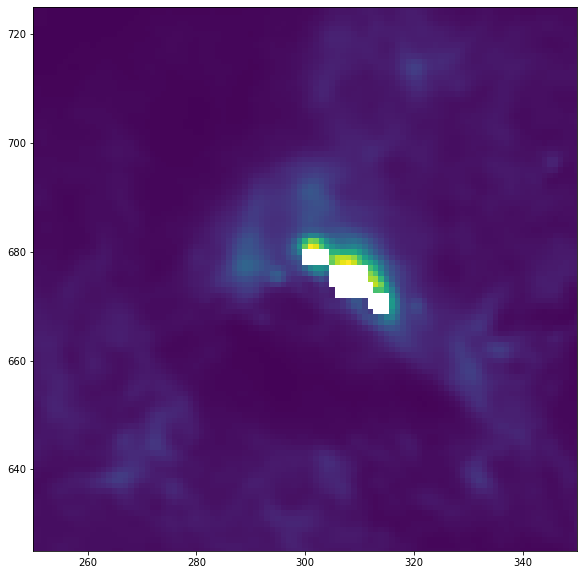

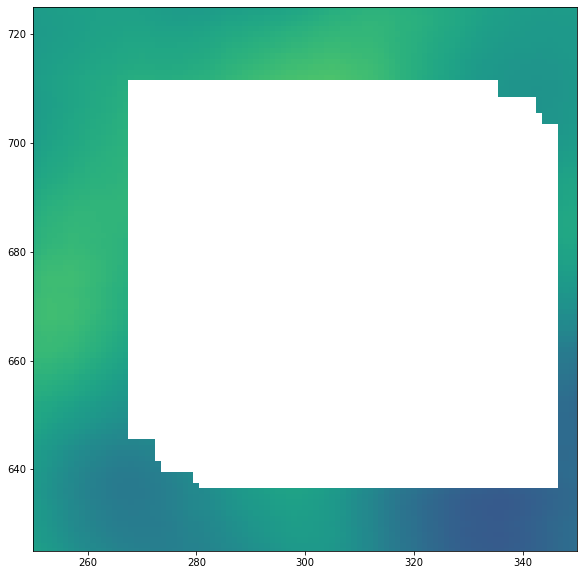

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(cube_32px[0], origin = 'lower')
# plt.xlim(250,350)
# plt.ylim(625,725)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(np.pad(cube_32px[1],((15,16),(15,16)), 'constant', constant_values = np.nan), origin = 'lower')
# plt.xlim(250,350)
# plt.ylim(625,725)
plt.show()